<a href="https://colab.research.google.com/github/elizabethlilies/KLBD2206014731/blob/main/cobaColab0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#langkah-langkah install pySPark

# Install pyspark
!pip install pyspark
# Import SparkSession
from pyspark.sql import SparkSession
# Create a Spark Session
spark = SparkSession.builder.master("local[*]").getOrCreate()
# Check Spark Session Information
spark
# Import a Spark function from library
from pyspark.sql.functions import col

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
#mengautentikasi klien Google Drive untuk mengunduh file yang akan diproses di Spark

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [7]:
#file Bombing_Operations.json.gz dan Aircraft_Glossary.json.gz muncul di tab File (panel sebelah kiri)

id='1L6pCQkldvdBoaEhRFzL0VnrggEFvqON4'
downloaded = drive.CreateFile({'id': id}) 
downloaded.GetContentFile('Bombing_Operations.json.gz')

id='14dyBmcTBA32uXPxDbqr0bFDIzGxMTWwl'
downloaded = drive.CreateFile({'id': id}) 
downloaded.GetContentFile('Aircraft_Glossary.json.gz')  

In [9]:
#mengimport library yang dibutuhkan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pyspark
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark import SparkContext, SparkConf

In [12]:
#untuk tahu versi spark yang sedang digunakan

spark

In [13]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
!./ngrok authtoken 23Jcuulpv3Whq9moPVNUbFMA4Yq_jRMNMXXQTYPjdcAax5Gd
!cat ~/.ngrok2/ngrok.yml
get_ipython().system_raw('./ngrok http 4050 &')

--2022-10-18 03:31:58--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.237.133.81, 54.161.241.46, 18.205.222.128, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.237.133.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  39.3MB/s    in 0.3s    

2022-10-18 03:31:58 (39.3 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13832437/13832437]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   
Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml
authtoken: 23Jcuulpv3Whq9moPVNUbFMA4Yq_jRMNMXXQTYPjdcAax5Gd


In [14]:
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/usr/lib/python3.7/json/__init__.py", line 296, in load
    parse_constant=parse_constant, object_pairs_hook=object_pairs_hook, **kw)
  File "/usr/lib/python3.7/json/__init__.py", line 348, in loads
    return _default_decoder.decode(s)
  File "/usr/lib/python3.7/json/decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/usr/lib/python3.7/json/decoder.py", line 355, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 1 (char 0)


Data yang akan digunakan adalah
# **PERANG VIETNAM**

**Pres. Johnson:** Apa pendapat Anda tentang Perang Vietnam ini? Saya ingin mendengar Anda berbicara sedikit.

**Senator Russell:** Sejujurnya, Tuan Presiden, ini adalah kekacauan yang paling buruk yang pernah saya lihat, dan saya tidak suka menyombongkan diri dan saya tidak pernah benar berkali-kali dalam hidup saya, tetapi saya tahu bahwa kami akan melakukannya masuk ke dalam kekacauan semacam ini ketika kami masuk ke sana.

27 Mei 1964
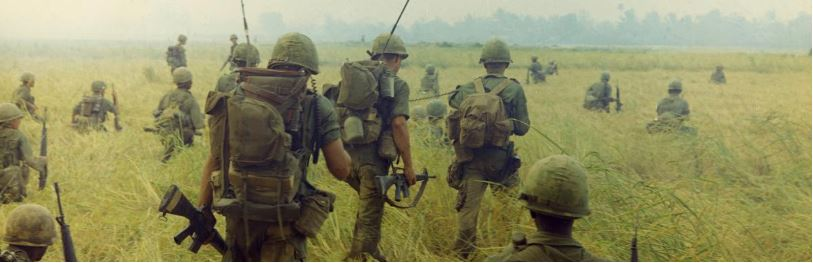

Perang Vietnam, juga dikenal sebagai Perang Indochina Kedua, dan di Vietnam dikenal sebagai Perang Perlawanan Melawan Amerika atau hanya Perang Amerika, konflik yang terjadi di Vietnam, Laos, dan Kamboja dari 1 November 1955 hingga jatuhnya Saigon pada 30 April 1975. Itu adalah Perang Indochina kedua dan secara resmi terjadi antara Vietnam Utara dan pemerintah Vietnam Selatan.

Dataset berikut menggambarkan semua operasi angkatan udara selama Perang Vietnam.

**Bombing_Operations.json.gz**
*   MissionDate: Tanggal misi
*   Pesawat Terbang: Model pesawat (contoh: EC-47)
*   ContryFlyingMisi: Negara
*   Operasi yang Didukung: Operasi Perang yang Didukung (contoh: Operasi Rolling Thunder)
*   PeriodeHari: Siang atau malam
*   Lokasi Lepas landas: Lepas landas bandara
*   WaktuPadaTarget
*   Jenis Senjata
*   SenjataDimuatBerat: berat senjata

**Aircraft_Glosarry.json.gz**
*   Pesawat Terbang: Model pesawat (contoh: EC-47)
*   AirCraftName
*   Jenis pesawat
*   Informasi Kumpulan Data:

Informasi Kumpulan Data:

THOR adalah basis data pemboman udara bersejarah yang dikembangkan dengan susah payah dari Perang Dunia I hingga Vietnam. THOR telah terbukti berguna dalam menemukan persenjataan yang belum meledak di Asia Tenggara dan meningkatkan taktik tempur Angkatan Udara: https://www.kaggle.com/usaf/vietnam-war-bombing-operations

In [16]:
#membaca kumpulan data

Bombing_Operations = spark.read.json("Bombing_Operations.json.gz")
Aircraft_Glossary = spark.read.json("Aircraft_Glossary.json.gz")

In [17]:
#mengecek skema

Bombing_Operations.printSchema()
Aircraft_Glossary.printSchema()

root
 |-- AirCraft: string (nullable = true)
 |-- ContryFlyingMission: string (nullable = true)
 |-- MissionDate: string (nullable = true)
 |-- OperationSupported: string (nullable = true)
 |-- PeriodOfDay: string (nullable = true)
 |-- TakeoffLocation: string (nullable = true)
 |-- TargetCountry: string (nullable = true)
 |-- TimeOnTarget: double (nullable = true)
 |-- WeaponType: string (nullable = true)
 |-- WeaponsLoadedWeight: long (nullable = true)

root
 |-- AirCraft: string (nullable = true)
 |-- AirCraftName: string (nullable = true)
 |-- AirCraftType: string (nullable = true)



In [18]:
#memunculkan sampe data dengan take()

Bombing_Operations.take(3)

[Row(AirCraft='EC-47', ContryFlyingMission='UNITED STATES OF AMERICA', MissionDate='1971-06-05', OperationSupported=None, PeriodOfDay='D', TakeoffLocation='TAN SON NHUT', TargetCountry='CAMBODIA', TimeOnTarget=1005.0, WeaponType=None, WeaponsLoadedWeight=0),
 Row(AirCraft='EC-47', ContryFlyingMission='UNITED STATES OF AMERICA', MissionDate='1972-12-26', OperationSupported=None, PeriodOfDay='D', TakeoffLocation='NAKHON PHANOM', TargetCountry='SOUTH VIETNAM', TimeOnTarget=530.0, WeaponType=None, WeaponsLoadedWeight=0),
 Row(AirCraft='RF-4', ContryFlyingMission='UNITED STATES OF AMERICA', MissionDate='1973-07-28', OperationSupported=None, PeriodOfDay='D', TakeoffLocation='UDORN AB', TargetCountry='LAOS', TimeOnTarget=730.0, WeaponType=None, WeaponsLoadedWeight=0)]

In [19]:
#memunculkan sample data dengan show()

Aircraft_Glossary.show()

+--------+--------------------+--------------------+
|AirCraft|        AirCraftName|        AirCraftType|
+--------+--------------------+--------------------+
|     A-1|Douglas A-1 Skyra...|         Fighter Jet|
|    A-26|Douglas A-26 Invader|        Light Bomber|
|    A-37|Cessna A-37 Drago...|Light ground-atta...|
|     A-4|McDonnell Douglas...|         Fighter Jet|
|     A-5|North American A-...|          Bomber Jet|
|     A-6|Grumman A-6 Intruder|     Attack Aircraft|
|     A-7|  LTV A-7 Corsair II|     Attack Aircraft|
|  AC-119|Fairchild AC-119 ...|Military Transpor...|
|  AC-123|Fairchild C-123 P...|Military Transpor...|
|  AC-130|Lockheed AC-130 S...|Fixed wing ground...|
|   AC-47|Douglas AC-47 Spooky|Ground attack air...|
|    AH-1| Bell AH-1 HueyCobra|          Helicopter|
|     B-1| Rockwell B-1 Lancer|Heavy strategic b...|
|    B-52| B-52 Stratofortress|    Strategic bomber|
|    B-57|Martin B-57 Canberra|     Tactical Bomber|
|    B-66|Douglas B-66 Dest...|        Light B

In [20]:
print("In total there are {0} operations".format(Bombing_Operations.count()))

In total there are 4400775 operations


# **Pertanyaan 1: Negara mana saja yang terlibat dan ada berapa misi pada tiap negara?**
Keywords: Dataframe API, SQL, group by, sort**

---



In [21]:
#menampilkan data yang ada pada Bombing_Operations.json.gz

Bombing_Operations.show()

+--------+--------------------+-----------+------------------+-----------+---------------+-------------+------------+--------------------+-------------------+
|AirCraft| ContryFlyingMission|MissionDate|OperationSupported|PeriodOfDay|TakeoffLocation|TargetCountry|TimeOnTarget|          WeaponType|WeaponsLoadedWeight|
+--------+--------------------+-----------+------------------+-----------+---------------+-------------+------------+--------------------+-------------------+
|   EC-47|UNITED STATES OF ...| 1971-06-05|              null|          D|   TAN SON NHUT|     CAMBODIA|      1005.0|                null|                  0|
|   EC-47|UNITED STATES OF ...| 1972-12-26|              null|          D|  NAKHON PHANOM|SOUTH VIETNAM|       530.0|                null|                  0|
|    RF-4|UNITED STATES OF ...| 1973-07-28|              null|          D|       UDORN AB|         LAOS|       730.0|                null|                  0|
|     A-1|UNITED STATES OF ...| 1970-02-02|   

In [22]:
#mengelompokkan misi berdasarkan kolom ContryFlyingMission dan menghitung berapa banyak catatan yang ada:
tmp1 = Bombing_Operations.groupBy("ContryFlyingMission").count().sort(desc("count"))
tmp1.show()

+--------------------+-------+
| ContryFlyingMission|  count|
+--------------------+-------+
|UNITED STATES OF ...|3708997|
|     VIETNAM (SOUTH)| 622013|
|                LAOS|  32777|
|       KOREA (SOUTH)|  24469|
|           AUSTRALIA|  12519|
+--------------------+-------+



In [25]:
#mengelompokkan misi berdasarkan kolom ContryFlyingMission dan menghitung berapa banyak catatan yang ada: (cara ke-2)
missions_counts = Bombing_Operations.groupBy("ContryFlyingMission")\
                                    .agg(count("*").alias("MissionsCount"))\
                                    .sort(desc("MissionsCount"))
missions_counts.show()

+--------------------+-------------+
| ContryFlyingMission|MissionsCount|
+--------------------+-------------+
|UNITED STATES OF ...|      3708997|
|     VIETNAM (SOUTH)|       622013|
|                LAOS|        32777|
|       KOREA (SOUTH)|        24469|
|           AUSTRALIA|        12519|
+--------------------+-------------+



In [26]:
#mengelompokkan misi berdasarkan kolom ContryFlyingMission dan menghitung berapa banyak catatan yang ada: (cara ke-3)
#menggunakan DataFrame API, dapat ditulis ulang groupby menggunakan SQL murni
Bombing_Operations.registerTempTable("Bombing_Operations")

query = """
SELECT ContryFlyingMission, count(*) as MissionsCount
FROM Bombing_Operations
GROUP BY ContryFlyingMission
ORDER BY MissionsCount DESC
"""

missions_counts = spark.sql(query)
missions_counts.show()

/usr/local/lib/python3.7/dist-packages/pyspark/sql/dataframe.py:229: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn("Deprecated in 2.0, use createOrReplaceTempView instead.", FutureWarning)


+--------------------+-------------+
| ContryFlyingMission|MissionsCount|
+--------------------+-------------+
|UNITED STATES OF ...|      3708997|
|     VIETNAM (SOUTH)|       622013|
|                LAOS|        32777|
|       KOREA (SOUTH)|        24469|
|           AUSTRALIA|        12519|
+--------------------+-------------+



In [28]:
#Memindahkan Dataframe ke Pandas:
missions_count_pd = missions_counts.toPandas()
missions_count_pd.head()

,ContryFlyingMission,MissionsCount
0,UNITED STATES OF AMERICA,3708997
1,VIETNAM (SOUTH),622013
2,LAOS,32777
3,KOREA (SOUTH),24469
4,AUSTRALIA,12519


Text(0.5, 1.0, 'Number of missions by Country')

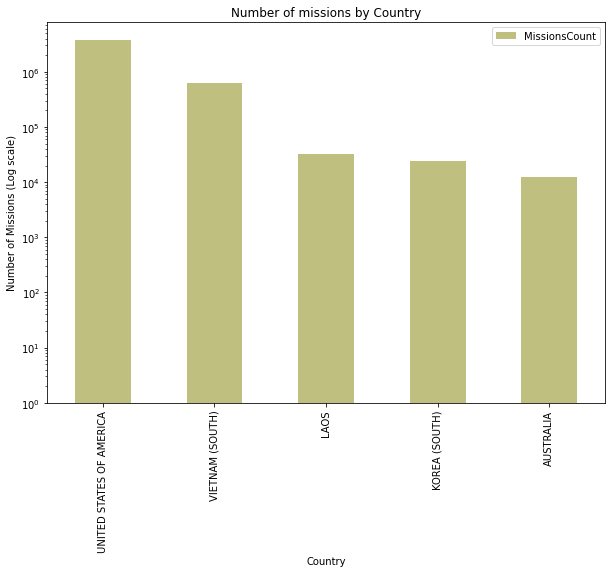

In [29]:
#membuat diagram batang dengan jumlah misi menurut negara
pl = missions_count_pd.plot(kind="bar", 
                            x="ContryFlyingMission", y="MissionsCount", 
                            figsize=(10, 7), log=True, alpha=0.5, color="olive")
pl.set_xlabel("Country")
pl.set_ylabel("Number of Missions (Log scale)")
pl.set_title("Number of missions by Country")

#**Pertanyaan 2: Tunjukkan jumlah misi berdasarkan waktu untuk masing-masing negara yang terlibat.**
Kata kunci: kelompokkan menurut, tanggal parse, plot

In [31]:
#memilih kolom yang relevan dengan pertanyaan 2:
#MissionDate yang diajukan diubah menjadi objek tanggal Python
missions_countries = Bombing_Operations.selectExpr(["to_date(MissionDate) as MissionDate", "ContryFlyingMission"])
missions_countries.show()

+-----------+--------------------+
|MissionDate| ContryFlyingMission|
+-----------+--------------------+
| 1971-06-05|UNITED STATES OF ...|
| 1972-12-26|UNITED STATES OF ...|
| 1973-07-28|UNITED STATES OF ...|
| 1970-02-02|UNITED STATES OF ...|
| 1970-10-08|     VIETNAM (SOUTH)|
| 1970-11-25|UNITED STATES OF ...|
| 1972-03-08|UNITED STATES OF ...|
| 1971-12-27|UNITED STATES OF ...|
| 1972-05-24|UNITED STATES OF ...|
| 1972-09-12|UNITED STATES OF ...|
| 1974-06-13|UNITED STATES OF ...|
| 1974-12-19|UNITED STATES OF ...|
| 1973-10-24|     VIETNAM (SOUTH)|
| 1974-03-19|     VIETNAM (SOUTH)|
| 1970-05-08|UNITED STATES OF ...|
| 1971-05-12|UNITED STATES OF ...|
| 1971-12-03|UNITED STATES OF ...|
| 1971-12-19|                LAOS|
| 1972-08-18|UNITED STATES OF ...|
| 1972-10-15|UNITED STATES OF ...|
+-----------+--------------------+
only showing top 20 rows



In [33]:
#mengelompokkan berdasarkan MissionDate dan ContryFlyingMission untuk mendapatkan hitungan:
missions_by_date = missions_countries\
                    .groupBy(["MissionDate", "ContryFlyingMission"])\
                    .agg(count("*").alias("MissionsCount"))\
                    .sort(asc("MissionDate"))
missions_by_date.show()

+-----------+--------------------+-------------+
|MissionDate| ContryFlyingMission|MissionsCount|
+-----------+--------------------+-------------+
| 1965-10-01|UNITED STATES OF ...|          447|
| 1965-10-02|UNITED STATES OF ...|          652|
| 1965-10-03|UNITED STATES OF ...|          608|
| 1965-10-04|UNITED STATES OF ...|          532|
| 1965-10-05|UNITED STATES OF ...|          697|
| 1965-10-05|     VIETNAM (SOUTH)|           72|
| 1965-10-06|     VIETNAM (SOUTH)|           49|
| 1965-10-06|UNITED STATES OF ...|          689|
| 1965-10-07|UNITED STATES OF ...|          605|
| 1965-10-07|     VIETNAM (SOUTH)|           50|
| 1965-10-08|     VIETNAM (SOUTH)|           64|
| 1965-10-08|UNITED STATES OF ...|          700|
| 1965-10-09|     VIETNAM (SOUTH)|           69|
| 1965-10-09|UNITED STATES OF ...|          677|
| 1965-10-10|     VIETNAM (SOUTH)|           59|
| 1965-10-10|UNITED STATES OF ...|          789|
| 1965-10-11|UNITED STATES OF ...|          455|
| 1965-10-11|     VI

In [37]:
#memplot konten dengan seri yang berbeda untuk setiap negara
fig = plt.figure(figsize=(10, 6))
for country, missions in missions_by_date.groupby("ContryFlyingMission"): 
    plt.plot(missions["MissionDate"], missions["MissionsCount"], label=country)

plt.legend(loc='best')

NameError: ignored

Kita dapat mengamati bagaimana Vietnam Selatan meningkatkan misinya mulai dari tahun 1970. Penurunan pada tahun 1973 dilatarbelakangi oleh Kesepakatan Perdamaian Paris yang terjadi pada tanggal 27 Januari 1973, untuk membangun perdamaian di Vietnam dan mengakhiri perang

#**Pertanyaan 3: Siapa yang mengebom lokasi ini?**
Katakunci: RDD map reduce cache save results

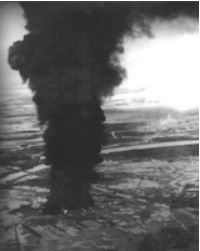

Gambar ini adalah fasilitas POL Hanoi (Vietnam Utara) yang terbakar setelah diserang oleh Angkatan Udara AS pada tanggal 29 Juni 1966 dalam rangka operasi Rolling Thunder.

In [39]:
#manampilkan data berdasarkan tanggal 29 Juni 1996
jun_29_operations = Bombing_Operations.where("MissionDate = '1966-06-29' AND TargetCountry='NORTH VIETNAM'")
jun_29_operations.show()

+--------+--------------------+-----------+------------------+-----------+---------------+-------------+------------+--------------+-------------------+
|AirCraft| ContryFlyingMission|MissionDate|OperationSupported|PeriodOfDay|TakeoffLocation|TargetCountry|TimeOnTarget|    WeaponType|WeaponsLoadedWeight|
+--------+--------------------+-----------+------------------+-----------+---------------+-------------+------------+--------------+-------------------+
|   F-105|UNITED STATES OF ...| 1966-06-29|       STEEL TIGER|          D|         TAKHLI|NORTH VIETNAM|       310.0|  1000LB MK-83|                 -1|
|   C-130|UNITED STATES OF ...| 1966-06-29|      ROLLING THUN|          N|         DANANG|NORTH VIETNAM|      1226.0|          null|                 -1|
|     F-4|UNITED STATES OF ...| 1966-06-29|      ROLLING THUN|          D|  CONSTELLATION|NORTH VIETNAM|       703.0| 2.75IN HE RKT|                 -1|
|   C-130|UNITED STATES OF ...| 1966-06-29|      ROLLING THUN|          N|        

In [42]:
#menghitung total misi pada 29 Juni 1966 dalam tampilan Pandas
jun_29_operations.groupBy("ContryFlyingMission").agg(count("*").alias("MissionsCount")).toPandas()

,ContryFlyingMission,MissionsCount
0,VIETNAM (SOUTH),6
1,UNITED STATES OF AMERICA,389


In [44]:
#menampilkan 1 misi (paling pertama) pada tanggal 29 Juni 1966
jun_29_operations.take(1)

[Row(AirCraft='F-105', ContryFlyingMission='UNITED STATES OF AMERICA', MissionDate='1966-06-29', OperationSupported='STEEL TIGER', PeriodOfDay='D', TakeoffLocation='TAKHLI', TargetCountry='NORTH VIETNAM', TimeOnTarget=310.0, WeaponType='1000LB MK-83', WeaponsLoadedWeight=-1)]

In [46]:
#men-cache isi di memori
jun_29_operations.cache()

DataFrame[AirCraft: string, ContryFlyingMission: string, MissionDate: string, OperationSupported: string, PeriodOfDay: string, TakeoffLocation: string, TargetCountry: string, TimeOnTarget: double, WeaponType: string, WeaponsLoadedWeight: bigint]

In [48]:
#menghitung jumlah baris dan memindahkan konten ke cache
%time jun_29_operations.count()

CPU times: user 347 µs, sys: 1.15 ms, total: 1.49 ms
Wall time: 319 ms


395

In [49]:
#kedua kalinya mencache data dan operasinya jauh lebih cepat
%time jun_29_operations.count()

CPU times: user 2.11 ms, sys: 153 µs, total: 2.26 ms
Wall time: 142 ms


395

In [50]:
#menyimpan hasil pada file...
jun_29_operations.write.mode('overwrite').json("jun_29_operations.json")

In [51]:
#membaca data file tadi
jun_29_operations = spark.read.json("jun_29_operations.json")

In [53]:
#menampilkan jumlah misi berdasarkan lokasi lepas landas
#menggunakan simple DataFrame API..
TakeoffLocationCounts = jun_29_operations\
                            .groupBy("TakeoffLocation").agg(count("*").alias("MissionsCount"))\
                            .sort(desc("MissionsCount"))
TakeoffLocationCounts.show()
#

+----------------+-------------+
| TakeoffLocation|MissionsCount|
+----------------+-------------+
|   CONSTELLATION|           87|
|          TAKHLI|           56|
|           KORAT|           55|
|        UDORN AB|           44|
|         UBON AB|           44|
|          RANGER|           35|
|          DANANG|           35|
|    TAN SON NHUT|           26|
|HANCOCK (CVA-19)|           10|
|    CAM RANH BAY|            2|
|         CUBI PT|            1|
+----------------+-------------+



In [54]:
#atau menggunakan format Map/Reduce dengan RDD
#pertama, memancarkan pasangan dalam format (Lokasi, 1):
all_locations = jun_29_operations.rdd.map(lambda row: (row.TakeoffLocation, 1))
all_locations.take(3)

[('TAKHLI', 1), ('DANANG', 1), ('CONSTELLATION', 1)]

In [55]:
#Kemudian, menjumlahkan penghitung di langkah reduce, dan mengurutkan berdasarkan jumlah:
locations_counts_rdd = all_locations.reduceByKey(lambda a, b: a+b).sortBy(lambda r: -r[1])
locations_counts_rdd.take(3)

[('CONSTELLATION', 87), ('TAKHLI', 56), ('KORAT', 55)]

In [56]:
#sekarang mengonversi RDD dalam dataframe melalui pemetaan pasangan ke objek dari tipe row
locations_counts_with_schema = locations_counts_rdd.map(lambda r: Row(TakeoffLocation=r[0], MissionsCount=r[1]))
locations_counts = spark.createDataFrame(locations_counts_with_schema)
locations_counts.show()

+----------------+-------------+
| TakeoffLocation|MissionsCount|
+----------------+-------------+
|   CONSTELLATION|           87|
|          TAKHLI|           56|
|           KORAT|           55|
|         UBON AB|           44|
|        UDORN AB|           44|
|          DANANG|           35|
|          RANGER|           35|
|    TAN SON NHUT|           26|
|HANCOCK (CVA-19)|           10|
|    CAM RANH BAY|            2|
|         CUBI PT|            1|
+----------------+-------------+



Hari itu lokasi lepas landas yang paling umum adalah kapal USS Constellation (CV-64). Kami tidak dapat mengidentifikasi satu lokasi lepas landas secara tunggal, tetapi kami dapat mengurangi kandidat yang mungkin. Langkah selanjutnya: jelajahi fitur TimeOnTarget.

USS Constellation (CV-64), supercarrier kelas Kitty Hawk, adalah kapal ketiga Angkatan Laut Amerika Serikat yang diberi nama untuk menghormati "rasi bintang baru" pada bendera Amerika Serikat. Salah satu kapal tercepat di Angkatan Laut, terbukti dengan kemenangannya dalam perlombaan kelompok pertempuran yang diadakan pada tahun 1985, ia dijuluki "Connie" oleh krunya dan secara resmi sebagai "Unggul Amerika".

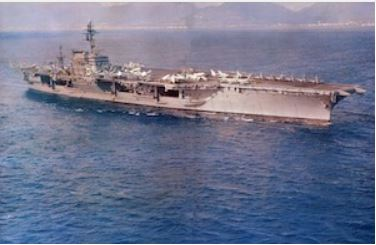

#**Pertanyaan 4: Apa jenis pesawat yang paling banyak digunakan selama perang Vietnam (jumlah misi)?**
Kata kunci: join grup by

In [57]:
#memeriksa isi dari Aircraft_Glossary:
Aircraft_Glossary.show(5)

+--------+--------------------+--------------------+
|AirCraft|        AirCraftName|        AirCraftType|
+--------+--------------------+--------------------+
|     A-1|Douglas A-1 Skyra...|         Fighter Jet|
|    A-26|Douglas A-26 Invader|        Light Bomber|
|    A-37|Cessna A-37 Drago...|Light ground-atta...|
|     A-4|McDonnell Douglas...|         Fighter Jet|
|     A-5|North American A-...|          Bomber Jet|
+--------+--------------------+--------------------+
only showing top 5 rows



In [59]:
#Pesawat yang diajukan
Bombing_Operations.select("AirCraft").show(5)

+--------+
|AirCraft|
+--------+
|   EC-47|
|   EC-47|
|    RF-4|
|     A-1|
|    A-37|
+--------+
only showing top 5 rows



In [64]:
#menggabungkan kedua dataframe di kolom AirCraft
#dengan dataframe API
missions_joined = Bombing_Operations.join(Aircraft_Glossary, 
                                          Bombing_Operations.AirCraft == Aircraft_Glossary.AirCraft)
missions_joined

DataFrame[AirCraft: string, ContryFlyingMission: string, MissionDate: string, OperationSupported: string, PeriodOfDay: string, TakeoffLocation: string, TargetCountry: string, TimeOnTarget: double, WeaponType: string, WeaponsLoadedWeight: bigint, AirCraft: string, AirCraftName: string, AirCraftType: string]

In [65]:
#pertaman, memilih bidang yang diminati:
missions_aircrafts = missions_joined.select("AirCraftType")
missions_aircrafts.show(5)

+--------------------+
|        AirCraftType|
+--------------------+
|Military Transpor...|
|Military Transpor...|
|  Fighter bomber jet|
|         Fighter Jet|
|Light ground-atta...|
+--------------------+
only showing top 5 rows



In [66]:
#kedua, mengelompokkan AirCraftType and menghitung:
missions_aircrafts.groupBy("AirCraftType").agg(count("*").alias("MissionsCount"))\
                  .sort(desc("MissionsCount"))\
                  .show()

+--------------------+-------------+
|        AirCraftType|MissionsCount|
+--------------------+-------------+
|  Fighter Jet Bomber|      1073126|
|         Fighter Jet|       882594|
|  Jet Fighter Bomber|       451385|
|     Attack Aircraft|       315246|
|Light ground-atta...|       267457|
|  Fighter bomber jet|       242231|
|Military Transpor...|       228426|
|  Utility Helicopter|       146653|
|    Strategic bomber|        99100|
|     Tactical Bomber|        82219|
|Observation Aircraft|        81820|
|Fixed wing ground...|        75058|
|Ground attack air...|        73843|
|Carrier-based Fig...|        58691|
|   Training Aircraft|        48435|
|       Light fighter|        39999|
|        Light Bomber|        39262|
|Light Tactical Bo...|        34738|
| Light Utility Plane|        28582|
|Observation/ Ligh...|        24491|
+--------------------+-------------+
only showing top 20 rows



In [67]:
#alternatif lain,  menulis ulang dalam SQL murni:
Bombing_Operations.registerTempTable("Bombing_Operations")
Aircraft_Glossary.registerTempTable("Aircraft_Glossary")

query = """
SELECT AirCraftType, count(*) MissionsCount
FROM Bombing_Operations bo
JOIN Aircraft_Glossary ag
ON bo.AirCraft = ag.AirCraft
GROUP BY AirCraftType
ORDER BY MissionsCount DESC
"""

spark.sql(query).show()

/usr/local/lib/python3.7/dist-packages/pyspark/sql/dataframe.py:229: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn("Deprecated in 2.0, use createOrReplaceTempView instead.", FutureWarning)


+--------------------+-------------+
|        AirCraftType|MissionsCount|
+--------------------+-------------+
|  Fighter Jet Bomber|      1073126|
|         Fighter Jet|       882594|
|  Jet Fighter Bomber|       451385|
|     Attack Aircraft|       315246|
|Light ground-atta...|       267457|
|  Fighter bomber jet|       242231|
|Military Transpor...|       228426|
|  Utility Helicopter|       146653|
|    Strategic bomber|        99100|
|     Tactical Bomber|        82219|
|Observation Aircraft|        81820|
|Fixed wing ground...|        75058|
|Ground attack air...|        73843|
|Carrier-based Fig...|        58691|
|   Training Aircraft|        48435|
|       Light fighter|        39999|
|        Light Bomber|        39262|
|Light Tactical Bo...|        34738|
| Light Utility Plane|        28582|
|Observation/ Ligh...|        24491|
+--------------------+-------------+
only showing top 20 rows



**Pesawat-pesawat jenis Fighter Jet Bomber berpartisipasi paling banyak dalam perang Vietnam.**

Catatan: Dataset ini memerlukan pembersihan dan normalisasi lebih lanjut. Lihat Fighter Jet Bomber, Jet Fighter Bomber, Fighter bomber jet